<a href="https://colab.research.google.com/github/SantiagoJejen/delivery_order/blob/feat%2Fmeli/Opdo_version_maestria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --user ortools

Librerias necesarias para el proyecto.

In [2]:
from ortools.linear_solver import pywraplp
from scipy.spatial import distance
import numpy as np
from random import randint
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
#print(solver.ExportModelAsLpFormat(False).replace('\\', '').replace(',_', ','), sep='\n')

## Problema:

## Datos:

Primeramente, se cargaron los datos necesarias para el resolver el problema, es decir, las ubicaciones espaciales de los clientes y las ubicaciones de los puntos que generan las tarjetas de crédito para ser enviadas.

In [279]:
ubi = pd.read_excel("https://raw.githubusercontent.com/SantiagoJejen/delivery_order/master/Datos.xlsx")

In [280]:
ubi = np.array(ubi)

In [179]:
ubi

array([[-22.9092543 , -43.1933687 ],
       [-22.91847879, -43.22674166],
       [-22.9141049 , -43.1818682 ],
       [-22.9833392 , -43.1924288 ],
       [-22.9655078 , -43.1834373 ],
       [-22.9655078 , -43.1834373 ],
       [-22.96730665, -43.18146966],
       [-22.9372578 , -43.1759213 ],
       [-22.9228947 , -43.217133  ],
       [-22.982423  , -43.205675  ],
       [-22.92132   , -43.1972954 ],
       [-22.927687  , -43.1755515 ],
       [-22.9233681 , -43.2352878 ],
       [-22.94961   , -43.186837  ],
       [-22.9844228 , -43.23096732],
       [-22.9459443 , -43.1857367 ],
       [-22.98654025, -43.19384471],
       [-22.94311192, -43.19220946],
       [-22.8972823 , -43.1938993 ],
       [-22.9551972 , -43.1957516 ],
       [-22.9497507 , -43.1857261 ],
       [-22.9325937 , -43.1784209 ],
       [-22.9838549 , -43.2026713 ],
       [-22.9357879 , -43.184944  ],
       [-22.9331841 , -43.1820375 ],
       [-22.9664865 , -43.1796729 ],
       [-22.9631047 , -43.1777493 ],
 

In [301]:
# Ubicaciones de los clientes
ubi = [[-22.9092543,	-43.1933687]
,[-22.918478794,	-43.226741664]
,[-22.9141049,	-43.1818682]
,[-22.9833392,	-43.1924288]
,[-22.9655078,	-43.1834373]
,[-22.9655078,	-43.1834373]
,[-22.967306649,	-43.181469664]
,[-22.9372578,	-43.1759213]
,[-22.9228947,	-43.217133]
,[-22.982423,	-43.205675]
,[-22.92132,	-43.1972954]
,[-22.927687,	-43.1755515]
,[-22.9233681,	-43.2352878]
,[-22.94961,	-43.186837]
,[-22.984422802,	-43.23096732]
,[-22.9459443,	-43.1857367]
,[-22.986540253,	-43.193844706]
,[-22.943111917,	-43.192209464]
,[-22.8972823,	-43.1938993]
,[-22.9551972,	-43.1957516]
,[-22.9497507,	-43.1857261]
,[-22.9325937,	-43.1784209]
,[-22.9838549,	-43.2026713]
,[-22.9357879,	-43.184944]
,[-22.9331841,	-43.1820375]
,[-22.9664865,	-43.1796729]
,[-22.9631047,	-43.1777493]
,[-22.9615202,	-43.1732085]
,[-22.957527,	-43.195622]
,[-22.9127603,	-43.1875035]
,[-22.9134051,	-43.2199913]
,[-22.918478794,	-43.226741664]
,[-22.981321121,	-43.192978017]
,[-22.917668476,	-43.187223338]
,[-22.9693814,	-43.1849099]
,[-22.929059,	-43.230951]
,[-22.9235277,	-43.2285539]
,[-22.9051311,	-43.2018175]
,[-22.96651,	-43.179512]
,[-22.939325529,	-43.173715062]
,[-22.9518995,	-43.1760391]
,[-22.899447,	-43.179484]
,[-22.972477551,	-43.190373592]
,[-22.98198,	-43.2057081]
,[-22.963893,	-43.172581]
,[-22.9149831,	-43.1897928]
,[-22.9742002,	-43.1913244]
,[-22.9078531,	-43.1733363]
,[-22.940952,	-43.1809363]
,[-22.965971,	-43.1893559]
,[-22.98514,	-43.2031333]
,[-22.929887894,	-43.17581255]
,[-22.9824576,	-43.1902656]
,[-22.9751613,	-43.2284452]
,[-22.93471,	-43.184053]
,[-22.9368648,	-43.1785919]
,[-22.9658064,	-43.1782853]
,[-22.9699378,	-43.1850143]
,[-22.9206767,	-43.2184957]
,[-22.922045496,	-43.207315095]
,[-22.9735475,	-43.1889193]
,[-22.973934,	-43.1912479]
,[-22.9771831,	-43.1917208]
,[-22.9087534,	-43.1710646]
,[-22.9222022,	-43.1797866]
,[-22.9038993,	-43.1753666]
,[-22.9492478,	-43.1879021]
,[-22.9124258,	-43.1929095]
,[-22.972556,	-43.203896]
,[-22.96294,	-43.1749716]
,[-22.9330015,	-43.1754351]
,[-22.9519613,	-43.1863013]
,[-22.9454948,	-43.1821807]
,[-22.9829054,	-43.1901476]
,[-22.9599203,	-43.2059602]
,[-22.9165345,	-43.188495]
,[-22.9626944,	-43.1732385]
,[-22.9205085,	-43.1944933]
,[-22.925105,	-43.182863]
,[-22.9750111,	-43.2285375]
,[-22.9161731,	-43.1922497]
,[-22.9137705,	-43.2010822]
,[-22.9699378,	-43.1850143]
,[-22.984683,	-43.199964]
,[-22.915969845,	-43.223968906]
,[-22.9776311,	-43.1913082]
,[-22.9663197,	-43.1812088]
,[-22.9143279,	-43.1828728]
,[-22.97636,	-43.19211]
,[-22.976678704,	-43.22909195]
,[-22.9362795,	-43.1756438]
,[-22.9187686,	-43.1810054]
,[-22.9347413,	-43.1773524]
,[-22.9296998,	-43.1758498]
,[-22.96287,	-43.174211]
,[-22.9835241,	-43.2137085]
,[-22.961934,	-43.169407]
,[-22.9713042,	-43.1858834]
,[-22.9719383,	-43.1877935]
,[-22.910514,	-43.1888352]
,[-22.9619953,	-43.1742337]
,[-22.9381998,	-43.1922065]
,[-22.9233815,	-43.2319409]
,[-22.9357067,	-43.1863523]
,[-22.9127561,	-43.1907552]
,[-22.9824343,	-43.2110767]
,[-22.9087706,	-43.1940492]
,[-22.9496785,	-43.1854424]
,[-22.9142607,	-43.183318]
,[-22.9661591,	-43.1854375]
,[-22.9566221,	-43.1981471]
,[-22.968777,	-43.185629]
,[-22.9660258,	-43.1781366]
,[-22.9631406,	-43.1756598]
,[-22.967708,	-43.1840686]
,[-22.9712177,	-43.1857302]
,[-22.9492054,	-43.1853888]
,[-22.967708,	-43.1840686]
,[-22.93711,	-43.177533]
,[-22.979927487,	-43.219742775]
,[-22.95390911,	-43.192608207]
,[-22.916451445,	-43.192579038]
,[-22.9670567,	-43.1881731]
,[-22.9818007,	-43.2004932]
,[-22.9413975,	-43.1817262]
,[-22.9871951,	-43.1929254]
,[-22.9868424,	-43.1939614]
,[-22.923973091,	-43.178560557]
,[-22.9491521,	-43.1859531]
,[-22.9159535,	-43.1899669]
,[-22.9212095,	-43.1842405]
,[-22.9822186,	-43.1962231]
,[-22.9824576,	-43.1902656]
,[-22.918253981,	-43.188875914]
,[-22.933149,	-43.1753938]
,[-22.9151535,	-43.1853794]
,[-22.9782191,	-43.1905355]
,[-22.937849,	-43.175092]
,[-22.9229093,	-43.2204994]
,[-22.9110791,	-43.1889469]
,[-22.906078604,	-43.176818378]
,[-22.9207017,	-43.1855204]
,[-22.9338014,	-43.1776217]
,[-22.9405399,	-43.196612]
,[-22.956050145,	-43.193292323]
,[-22.977901,	-43.19112]
,[-22.9776311,	-43.1913082]
,[-22.9638579,	-43.173244]
,[-22.9707112,	-43.1864433]
,[-22.925837,	-43.179154]
,[-22.9381985,	-43.1831445]
,[-22.9670501,	-43.1864638]
,[-22.9525849,	-43.1937824]
,[-22.9131946,	-43.182479]
,[-22.9276912,	-43.1761534]
,[-22.9175277,	-43.1978375]
,[-22.9733542,	-43.2055845]
,[-22.965861,	-43.217188]
,[-22.967306649,	-43.181469664]
,[-22.9191804,	-43.184855]
,[-22.9829356,	-43.1919106]
,[-22.9650412,	-43.1771]
,[-22.899447,	-43.179484]
,[-22.9206767,	-43.2184957]
,[-22.9769225,	-43.1889314]
,[-22.982029253,	-43.190908203]
,[-22.9624117,	-43.178673]
,[-22.967088,	-43.1819555]
,[-22.9871,	-43.194561]
,[-22.9551508,	-43.177736]
,[-22.9658477,	-43.1921283]
,[-22.9127316,	-43.2263514]
,[-22.9668051,	-43.1802215]
,[-22.9159535,	-43.1899669]
,[-22.939431,	-43.17669]
,[-22.975845,	-43.1881512]
,[-22.9137452,	-43.1827953]
,[-22.939284155,	-43.175876252]
,[-22.967708,	-43.1840686]
,[-22.901763,	-43.17937]
,[-22.9038343,	-43.1825421]
,[-22.932345479,	-43.181205131]
,[-22.9821567,	-43.2256597]
,[-22.9388604,	-43.1731924]
,[-22.909067,	-43.1782946]
,[-22.975349536,	-43.192021139]
,[-22.9576007,	-43.1977513]
,[-22.927063732,	-43.175443746]
,[-22.962249773,	-43.168598749]
,[-22.981563,	-43.193777]
,[-22.9159535,	-43.1899669]
,[-22.959051,	-43.195659]
,[-22.95871543,	-43.20043182]
,[-22.9563248,	-43.1886164]
,[-22.9555772,	-43.1751763]
,[-22.9237483,	-43.2338438]
,[-22.986619,	-43.197856]
,[-22.9646,	-43.194684]
,[-22.9617328,	-43.1734942]
,[-22.9151638,	-43.1879354]
,[-22.914329,	-43.182382]
,[-22.9200907,	-43.1802424]
,[-22.9038343,	-43.1825421]
,[-22.9235277,	-43.2285539]
,[-22.9636205,	-43.1756861]
,[-22.903838,	-43.2215012]
,[-22.9804019,	-43.1907763]
,[-22.9329308,	-43.1810727]
,[-22.9271844,	-43.1792506]

,[-22.9395078,	-43.1766484]
,[-22.9742002,	-43.1913244]
,[-22.9495771,	-43.1826996]
,[-22.9130229,	-43.1842979]
,[-22.967708,	-43.1840686]
,[-22.9721093,	-43.18683]
,[-22.9647053,	-43.1904308]
,[-22.9233815,	-43.2319409]
,[-22.965088327,	-43.183044791]
,[-22.927765,	-43.1741486]
,[-22.8979701,	-43.1895772]
,[-22.982534,	-43.209235]
,[-22.916673996,	-43.187801837]
,[-22.9514222,	-43.191835]
,[-22.980438,	-43.202618]
,[-22.9123801,	-43.1928479]
,[-22.9560208,	-43.1815362]
,[-22.910535,	-43.1889378]
,[-22.9371419,	-43.1890551]
,[-22.929059,	-43.230951]
,[-22.9619214,	-43.2072534]
,[-22.9625667,	-43.1697504]
,[-22.972477551,	-43.190373592]
,[-22.9835899,	-43.1961882]
,[-22.9875393,	-43.2291559]
,[-22.945579974,	-43.185884915]
,[-22.9663959,	-43.1869641]
,[-22.9352595,	-43.179183]
,[-22.9177448,	-43.1869991]
,[-22.9835241,	-43.2137085]
,[-22.9753567,	-43.1920137]
,[-22.91348124,	-43.186388165]
,[-22.9732827,	-43.1899523]
,[-22.970459644,	-43.188243532]
,[-22.927765,	-43.1741486]
,[-22.980438,	-43.202618]
,[-22.917404,	-43.213528]
,[-22.9758008,	-43.1879943]
,[-22.924608522,	-43.178533986]
,[-22.9126702,	-43.1772664]
,[-22.955745,	-43.188543]
,[-22.9078531,	-43.1733363]
,[-22.9695922,	-43.1844154]
,[-22.9053528,	-43.1755908]
,[-22.9834973,	-43.211079]
,[-22.9775568,	-43.1919479]
,[-22.936299,	-43.185245]
,[-22.9271259,	-43.1738086]
,[-22.9774213,	-43.2250809]
,[-22.9611163,	-43.1904643]
,[-22.9399192,	-43.1909785]
,[-22.9611957,	-43.168849]
,[-22.981946,	-43.1955673]
,[-22.9418552,	-43.1806948]
,[-22.96001,	-43.201367]
,[-22.9327809,	-43.1845294]
,[-22.939417849,	-43.177002445]
,[-22.98514,	-43.2031333]
,[-22.9842366,	-43.1912751]
,[-22.915089,	-43.1869082]
,[-22.943142081,	-43.19129996]
,[-22.933031608,	-43.175311915]
,[-22.9405399,	-43.196612]
,[-22.98212,	-43.203148]
,[-22.981972404,	-43.199055567]
,[-22.961178475,	-43.215640254]
,[-22.980856,	-43.2206]
,[-22.9742002,	-43.1913244]
,[-22.983717,	-43.190876]
,[-22.928734,	-43.17952]
,[-22.967725,	-43.182937]
,[-22.9558897,	-43.1791742]
,[-22.9121996,	-43.2019907]
,[-22.964138,	-43.176238]
,[-22.9060297,	-43.1793347]
,[-22.9197825,	-43.195807]
,[-22.9768298,	-43.1968611]
,[-22.96723,	-43.186641]
,[-22.9862818,	-43.1930623]
,[-22.9508333,	-43.1875581]
,[-22.9418397,	-43.1766621]
,[-22.9500281,	-43.1882229]
,[-22.9866994,	-43.1940511]
,[-22.9168016,	-43.1769108]
,[-22.9368427,	-43.1897249]
,[-22.915017,	-43.19315]
,[-22.928113,	-43.177066]
,[-22.945116,	-43.161907]
,[-22.9197689,	-43.1798366]
,[-22.9414397,	-43.1766991]
,[-22.9508034,	-43.1872411]]

ubi = np.array(ubi)

In [278]:
ubi

array([[-22.9092543 , -43.1933687 ],
       [-22.91847879, -43.22674166],
       [-22.9141049 , -43.1818682 ],
       [-22.9833392 , -43.1924288 ],
       [-22.9655078 , -43.1834373 ],
       [-22.9655078 , -43.1834373 ],
       [-22.96730665, -43.18146966],
       [-22.9372578 , -43.1759213 ],
       [-22.9228947 , -43.217133  ],
       [-22.982423  , -43.205675  ],
       [-22.92132   , -43.1972954 ],
       [-22.927687  , -43.1755515 ],
       [-22.9233681 , -43.2352878 ],
       [-22.94961   , -43.186837  ],
       [-22.9844228 , -43.23096732],
       [-22.9459443 , -43.1857367 ],
       [-22.98654025, -43.19384471],
       [-22.94311192, -43.19220946],
       [-22.8972823 , -43.1938993 ],
       [-22.9551972 , -43.1957516 ],
       [-22.9497507 , -43.1857261 ],
       [-22.9325937 , -43.1784209 ],
       [-22.9838549 , -43.2026713 ],
       [-22.9357879 , -43.184944  ],
       [-22.9331841 , -43.1820375 ],
       [-22.9664865 , -43.1796729 ],
       [-22.9631047 , -43.1777493 ],
 

In [302]:
# Ubicaciones de tiendas
ubistores = [[-22.9746298,	-43.1912063]
,[-22.9336112,	-43.1757339]
,[-22.980438,	-43.202618]
,[-22.9123072,	-43.2019991]]
ubistores = np.array(ubistores)

In [303]:
# Costo promedio de imprimir tarjetas en pesos reales (Brasil).
costo_imp_tienda=[50.03,57.53,46.28,58.79]

In [304]:
# Cálculo de número de clientes como número de ubicaciones.
numero_clientes=len(ubi)
# Cálculo de número de tiendas como número de ubicaciones.
longitud_tienda=len(costo_imp_tienda)
# Números de días para repartición.
numero_dias=31

In [305]:
# Cálculo de distancias entre los clientes y las tiendas de repartición.
distancia_tienda_cliente = [[distance.euclidean(ubi[k], ubistores[i]) for i in range(longitud_tienda)] for k in range(numero_clientes)]

In [306]:
distancia_tienda_cliente[1]

[0.06645071534170947,
 0.0532050909183427,
 0.06648980653405077,
 0.025500647948531022]

In [307]:
# Costo por kilometro en pesos reales (Brasil).
costo_km = 6.62

In [308]:
# Capacidad diaría de tiendas.
capacidad_tienda=[100,150,50,100]

## Planteamiento:

In [309]:
# Planteamiento del Solver para respuestas enteras.
solver = pywraplp.Solver.CreateSolver('SCIP')

Lista de indices:
- i = {1,2,3,4}  **La Store i** 
- j = {1,2,3,...,30}  **El dia J del mes de Abril**
- k = {1,2,3,...,300}  **El cliente K que solicita la tarjeta**


Lista de Variables:

  \begin{align}
    X_{i,j,k}  
 \end{align}


 \begin{align}
\text X_{i,j,k} = \left\{
\begin{array}{cl}
1 &  \text{Si la tarjeta impresa en la tienda i es entregada en el día j  al cliente k  } \\
0 & \text{En otro caso}
\end{array}
\right.
\end{align}

In [310]:
# Variables que indican la tienda, el día de reparto y el cliente.
x = [[[solver.IntVar(0, 1, f'x[{tienda}, {dia},{cliente} ]') for cliente in range(numero_clientes) ] for dia in range(numero_dias) ] for tienda  in range(len(costo_imp_tienda))]

Funcion Objetivo:

\begin{align}
        \text{Min: C} =  &\sum_{i=1} \sum_{j=1} \sum_{k=1} X_{i,j,k} * CosImpre(i) + CostoKm \sum_{i=1} \sum_{j=1} \sum_{k=1} X_{i,j,k} * DistTiendaCliente(i,k) \\[1em]
        \text{ }  
    \end{align}

In [311]:
objetivo = solver.Objective()
for i in range(longitud_tienda):
  for j in range(numero_dias):
    for k in range(numero_clientes):
      objetivo.SetCoefficient(x[i][j][k], costo_imp_tienda[i])

In [312]:
for i in range(longitud_tienda):
  for j in range(numero_dias):
    for k in range(numero_clientes):
      objetivo.SetCoefficient(x[i][j][k], costo_km*distancia_tienda_cliente[k][i])

In [313]:
objetivo.SetMinimization()

## Restricciones:





**Capacidad máxima por tienda diaria**: Cada tienda tiene una capacidad de impresion diaria

In [314]:
for j in range(numero_dias):  
    solver.Add(solver.Sum([x[i][j][k] for i in range(longitud_tienda) for k in range(numero_clientes)])<=capacidad_tienda[i])


**Restriccion de entregar tarjetas:** Las tarjetas se deben entregar o dejar pendientes para el siguiente mes y un cliente solo debe recibir una tarjeta.


In [315]:
for k in range(numero_clientes):
  solver.Add(solver.Sum([x[i][j][k] for i in range(longitud_tienda) for j in range(31)])==1)

Sin embargo, algunos clientes quieren recibir la tarjeta en un día especifico, por lo que programaron la entrega.

In [316]:
SchedulesClientes = [[0,6],[1,6],[10,10],[11,12],[13,6]]

for cliente in SchedulesClientes:
  solver.Add(solver.Sum([x[i][cliente[1]][cliente[0]] for i in range(longitud_tienda)])==1)

In [317]:
for j in range(numero_dias):
  for i in range(longitud_tienda):
    solver.Add(solver.Sum([x[i][j][k] for k in range(numero_clientes)])>=1)

## Resultados:


In [318]:
status= solver.Solve()
dataset=[]
if status == pywraplp.Solver.OPTIMAL:
  print('Solución')
  print('Función objetivo =', solver.Objective().Value())
  for i in range(longitud_tienda):
    for j in range(numero_dias):
      for k in range(numero_clientes): 
        if x[i][j][k].solution_value() != 0.0:
          #print( x[i][j][k])
          dataset.append([i,j,k]) 
else:
  print('No sirve')

Solución
Función objetivo = 26.16014105829372


In [319]:
df = pd.DataFrame (dataset, index = None, columns=None, dtype='category')
df.columns=['OriginStore','day','client']
df['count']=1

In [320]:

fig = px.bar(df, x='day', y='count',
              color='OriginStore',
              hover_data=['client'],
            #  facet_row="OriginStore",
             color_discrete_sequence=px.colors.qualitative.Safe,
             labels={'OriginStore':'Origin Store'}, height=400)


fig.show()

In [266]:
df = df.sort_values('client')
df['index']= df['client']
df.set_index('index',inplace = True)

dfubi = pd.DataFrame (ubi, index = None, columns=None)
dfubi.columns=['lat','log']
dfubi['name']=1

dffull = pd.concat([df,dfubi], axis = 1)
dffull

,OriginStore,day,client,count,lat,log,name
0,3,6,0,1,-22.909254,-43.193369,1
1,3,6,1,1,-22.918479,-43.226742,1
2,3,4,2,1,-22.914105,-43.181868,1
3,0,14,3,1,-22.983339,-43.192429,1
4,0,27,4,1,-22.965508,-43.183437,1
...,...,...,...,...,...,...,...
295,1,4,295,1,-22.928113,-43.177066,1
296,1,30,296,1,-22.945116,-43.161907,1
297,1,24,297,1,-22.919769,-43.179837,1
298,1,25,298,1,-22.941440,-43.176699,1


In [267]:
figubi = px.scatter_mapbox(dffull, lat="lat", lon="log", hover_name="name", hover_data=["OriginStore"], 
                         zoom=3, height=300, color = 'OriginStore')
figubi.update_layout(mapbox_style="open-street-map")
figubi.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
figubi.show()

In [268]:
df = df.sort_values('client')
df['index']= df['client']
df.set_index('index',inplace = True)
df

,OriginStore,day,client,count
index,,,,
0,3,6,0,1
1,3,6,1,1
2,3,4,2,1
3,0,14,3,1
4,0,27,4,1
...,...,...,...,...
295,1,4,295,1
296,1,30,296,1
297,1,24,297,1


## Método de los Vecinos Cercanos:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



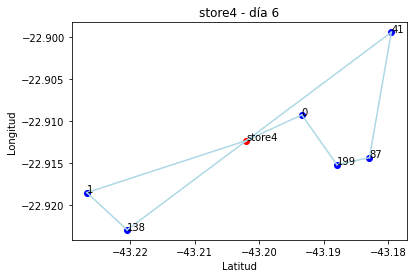

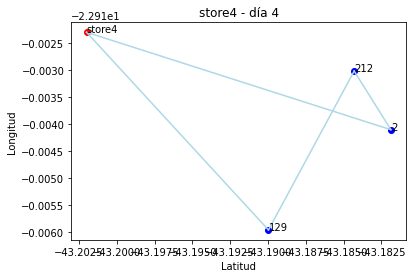

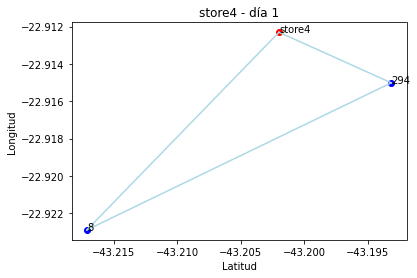

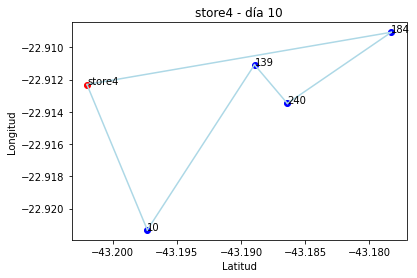

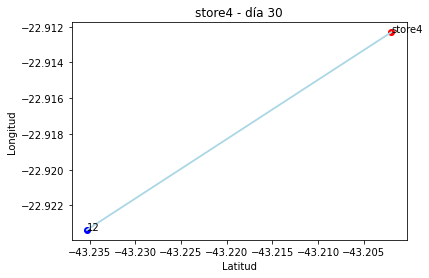

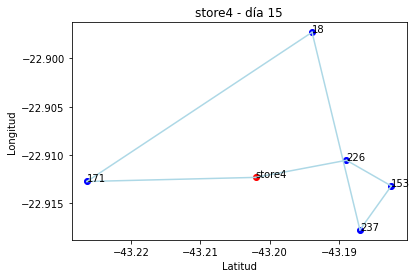

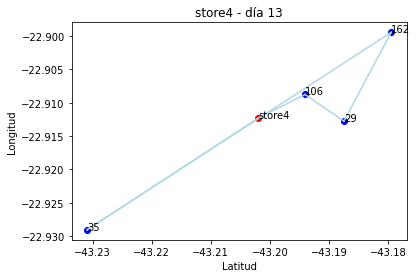

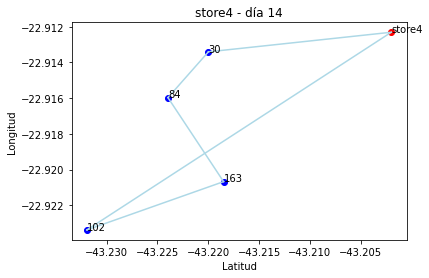

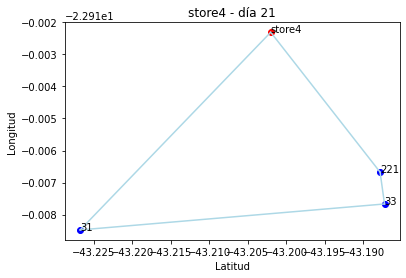

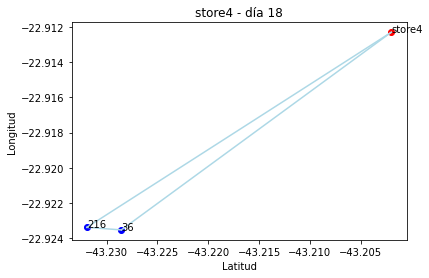

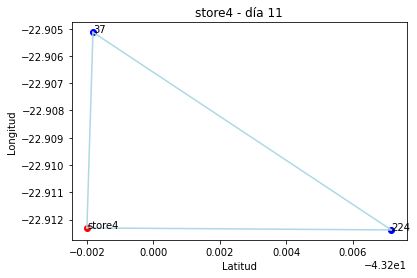

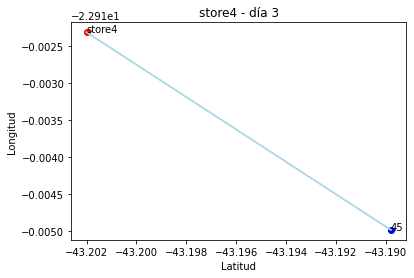

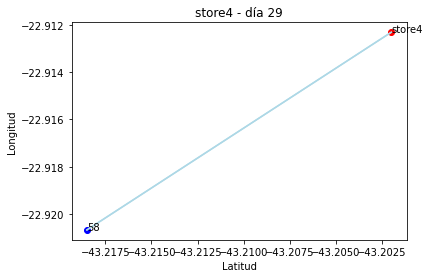

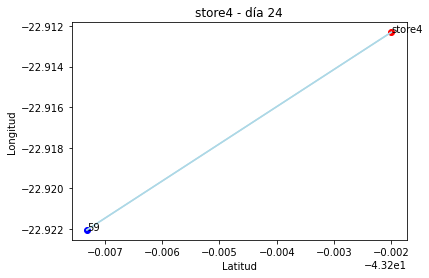

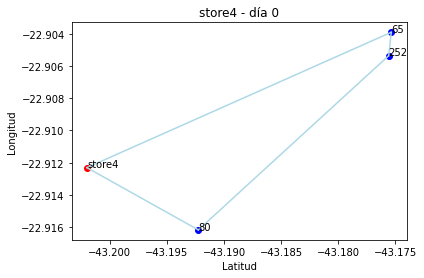

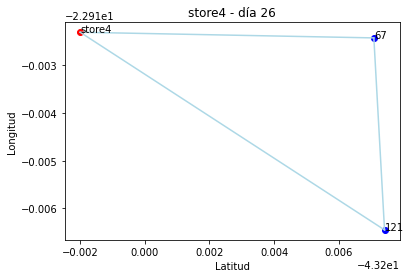

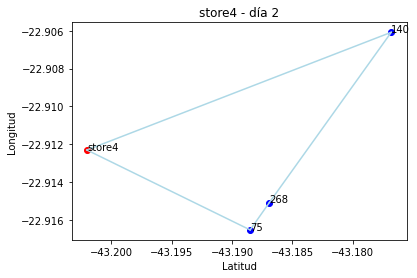

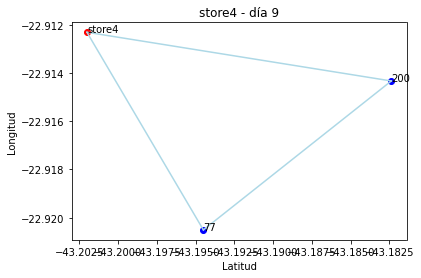

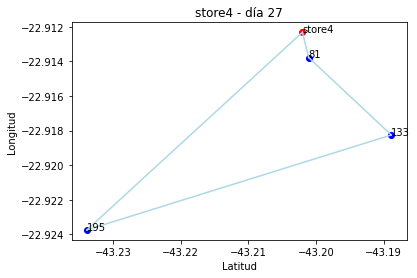

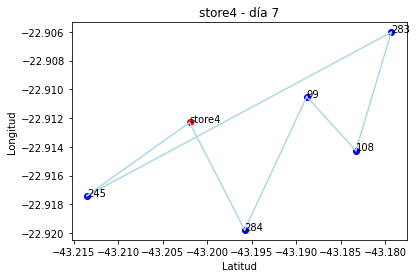

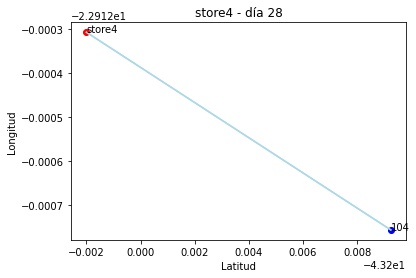

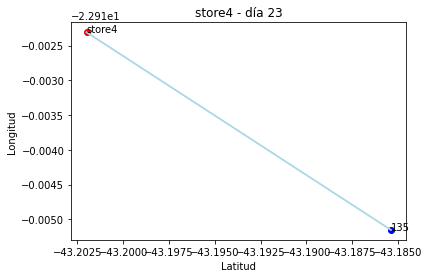

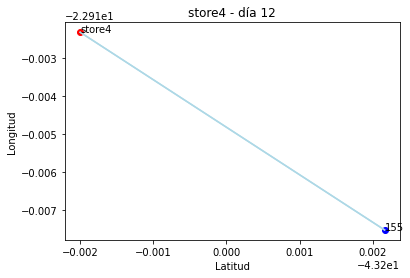

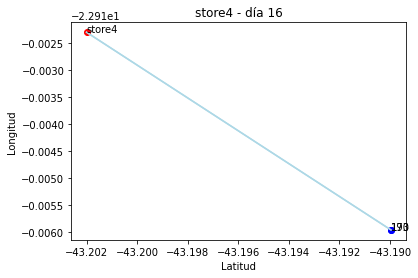

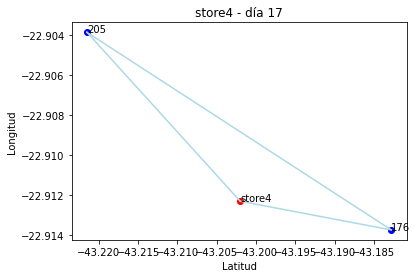

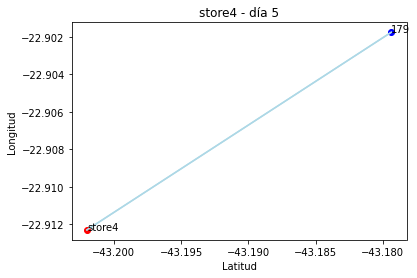

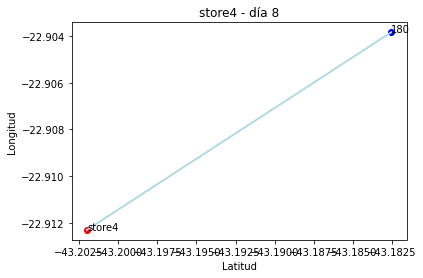

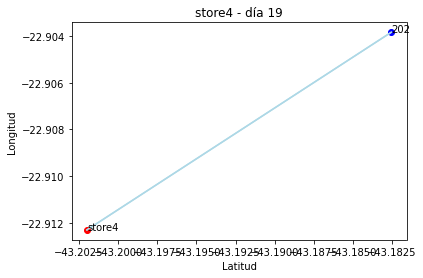

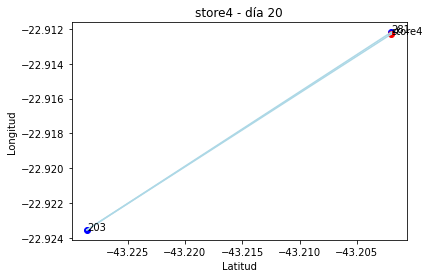

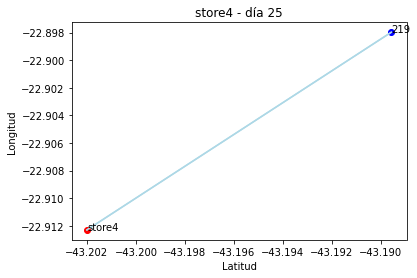

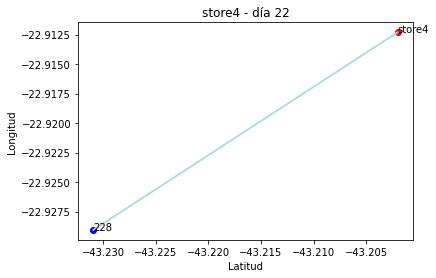

In [274]:
numtienda = 3
tienda ='store4'
base1 = df[df.OriginStore == numtienda]
for m in base1.day.unique().astype('int32'):
    base = base1[base1.day.astype('int32') == m]
    clientes = [i for i in base.client]
    arcos = [(i,j) for i in clientes for j in clientes if i != j]
    distancia = {(i,j): distance.euclidean(ubi[i], ubi[j]) 
                              for i,j in arcos}
    for i in clientes:
        distancia[(tienda,i)] = distance.euclidean(ubistores[numtienda], ubi[i]) 
    n = len(clientes)
    values = []
    for i in range(n):
        values.append(clientes[i])
    values.append(tienda)
    starting_node = tienda
    NN = [starting_node]
    while len(NN)<=n:
        k = NN[-1]
        nn = {(k,j):distancia[(k,j)] for j in values if k != j and j not in NN}
        new = min(nn.items(),key = lambda x:x[1])
        NN.append(new[0][1])
    NN.append(starting_node)
    latitud = []
    for i in clientes:
        latitud.append(ubi[i][0])
    latitud.append(ubistores[numtienda][0])
    longitud = []
    for i in clientes:
        longitud.append(ubi[i][1])
    longitud.append(ubistores[numtienda][1])
    clientes.append(tienda)
    x = longitud
    y = latitud
    figure, axis = plt.subplots(len(base.day.unique()),1, squeeze = False)
    for c in range(len(base.day.unique())):
        axis[c,0].scatter(x[:n],y[:n],color = 'blue')
        axis[c,0].scatter(x[n],y[n],color = 'red')
        for i in range(len(clientes)):
            axis[c,0].annotate(clientes[i], (x[i], y[i]))
        for n in range(len(NN)-1):
            axis[c,0].plot([longitud[clientes.index(NN[n])], longitud[clientes.index(NN[n+1])]],
             [latitud[clientes.index(NN[n])], latitud[clientes.index(NN[n+1])]], color = 'lightblue')
        axis[c,0].set_title(tienda+' - día '+str(m))
        axis[c,0].set_xlabel('Latitud')
        axis[c,0].set_ylabel('Longitud')